In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
df = pd.read_csv("data/heart_disease_uci.csv").set_index("id")
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df["dataset"].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


In [5]:
df.rename(columns = {"dataset":"location", "cp":"chest pain", "trestbps":"resting blood pressure", "chol":"cholesterol", "fbs":"fasting blood sugar",
          "restecg":"resting electrocardiographic results", "thalch":"maximum heart rate", "exang":"exercise-induced angina", "ca":"number of major vessels colored",
          "num":"target"}, inplace=True)

In [6]:
df.head()

,age,sex,location,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise-induced angina,oldpeak,slope,number of major vessels colored,thal,target
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   920 non-null    int64  
 1   sex                                   920 non-null    object 
 2   location                              920 non-null    object 
 3   chest pain                            920 non-null    object 
 4   resting blood pressure                861 non-null    float64
 5   cholesterol                           890 non-null    float64
 6   fasting blood sugar                   830 non-null    object 
 7   resting electrocardiographic results  918 non-null    object 
 8   maximum heart rate                    865 non-null    float64
 9   exercise-induced angina               865 non-null    object 
 10  oldpeak                               858 non-null    float64
 11  slope                   

In [8]:
df["number of major vessels colored"].unique()

array([ 0.,  3.,  2.,  1., nan])

In [9]:
df["exercise-induced angina"] = df["exercise-induced angina"].astype(bool)
df["fasting blood sugar"] = df["fasting blood sugar"].astype(bool)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   920 non-null    int64  
 1   sex                                   920 non-null    object 
 2   location                              920 non-null    object 
 3   chest pain                            920 non-null    object 
 4   resting blood pressure                861 non-null    float64
 5   cholesterol                           890 non-null    float64
 6   fasting blood sugar                   920 non-null    bool   
 7   resting electrocardiographic results  918 non-null    object 
 8   maximum heart rate                    865 non-null    float64
 9   exercise-induced angina               920 non-null    bool   
 10  oldpeak                               858 non-null    float64
 11  slope                   

In [11]:
is_null = df.isnull().sum()
is_null[is_null>0].sort_values(ascending=False)

number of major vessels colored         611
thal                                    486
slope                                   309
oldpeak                                  62
resting blood pressure                   59
maximum heart rate                       55
cholesterol                              30
resting electrocardiographic results      2
dtype: int64

In [12]:
df.drop(columns=["number of major vessels colored", "thal"], inplace=True)

In [13]:
df.head()

,age,sex,location,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise-induced angina,oldpeak,slope,target
id,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


In [14]:
is_null[is_null>0].sort_values(ascending=False)

number of major vessels colored         611
thal                                    486
slope                                   309
oldpeak                                  62
resting blood pressure                   59
maximum heart rate                       55
cholesterol                              30
resting electrocardiographic results      2
dtype: int64

In [15]:
#sploe - missing category 
#oldpeak - median
#rbp - median
#mhr - median
#chol - median
#rer - mode

med_cols = ["oldpeak", "resting blood pressure", "maximum heart rate", "cholesterol"]
for col in med_cols:
    df[col] = df[col].fillna(df[col].median())

In [16]:
is_null[is_null>0].sort_values(ascending=False)

number of major vessels colored         611
thal                                    486
slope                                   309
oldpeak                                  62
resting blood pressure                   59
maximum heart rate                       55
cholesterol                              30
resting electrocardiographic results      2
dtype: int64

In [17]:
df["slope"] = df["slope"].fillna(df["slope"].mode()[0])
df["resting electrocardiographic results"] = df["resting electrocardiographic results"].fillna(df["resting electrocardiographic results"].mode()[0])

In [18]:
df.head()

,age,sex,location,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise-induced angina,oldpeak,slope,target
id,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


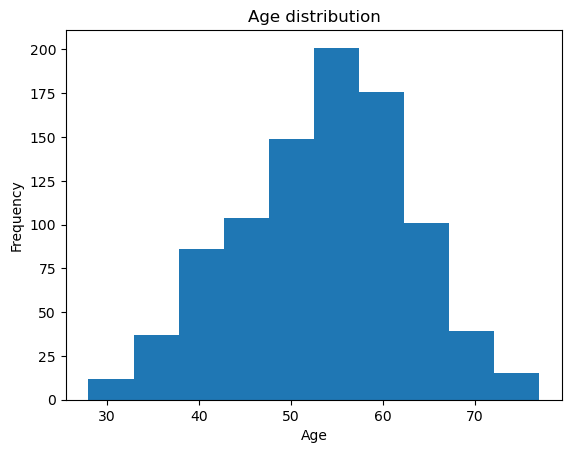

In [19]:
df["age"].plot(kind="hist")

plt.xlabel("Age")
plt.title("Age distribution");

<Axes: xlabel='age'>

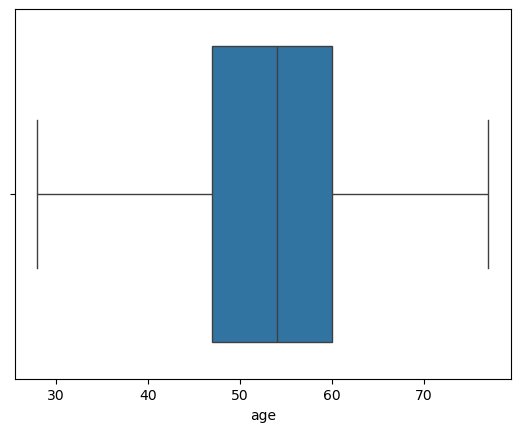

In [20]:
seaborn.boxplot(data=df, x="age")

In [21]:
df["age"].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [22]:
df["sex"].value_counts(normalize=True)

sex
Male      0.78913
Female    0.21087
Name: proportion, dtype: float64

<Axes: xlabel='proportion', ylabel='sex'>

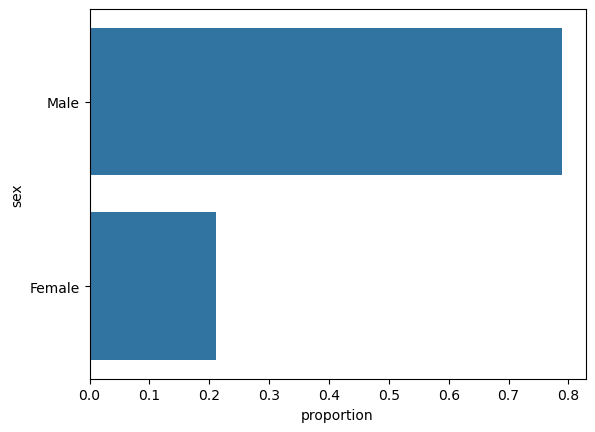

In [23]:
seaborn.barplot(data=df["sex"].value_counts(normalize=True), orient="y")

In [24]:
df.head()

,age,sex,location,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise-induced angina,oldpeak,slope,target
id,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


In [25]:
df_corr = df[["age", "resting blood pressure", "cholesterol", "maximum heart rate"]]
df_corr.corr()

,age,resting blood pressure,cholesterol,maximum heart rate
age,1.000000,0.230784,-0.086010,-0.349715
resting blood pressure,0.230784,1.000000,0.089484,-0.104747
cholesterol,-0.086010,0.089484,1.000000,0.226047
maximum heart rate,-0.349715,-0.104747,0.226047,1.000000


In [26]:
df[["resting blood pressure", "exercise-induced angina", "cholesterol"]].corr()

,resting blood pressure,exercise-induced angina,cholesterol
resting blood pressure,1.000000,0.136798,0.089484
exercise-induced angina,0.136798,1.000000,-0.035018
cholesterol,0.089484,-0.035018,1.000000


In [27]:
df.groupby("sex").aggregate({"fasting blood sugar":"count"})

,fasting blood sugar
sex,
Female,194
Male,726


In [29]:
grouped = df.groupby(["target", "sex"]).size().unstack()

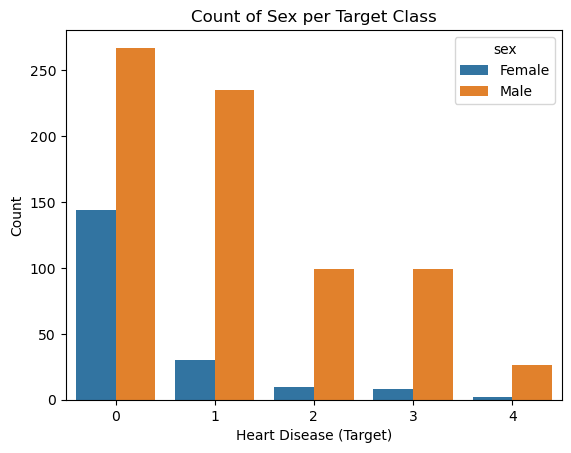

In [30]:
import seaborn as sns

# Reshape the DataFrame for seaborn
grouped_reset = grouped.reset_index().melt(id_vars='target', value_name='count')

# Plot
sns.barplot(data=grouped_reset, x='target', y='count', hue='sex')
plt.title('Count of Sex per Target Class')
plt.xlabel('Heart Disease (Target)')
plt.ylabel('Count')
plt.show()


In [31]:
df.head()

,age,sex,location,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise-induced angina,oldpeak,slope,target
id,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


In [32]:
y = df[df.columns[-1]]
X = df[df.columns[0:len(df.columns)-1]]

In [33]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

pipeline = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000, class_weight='balanced')
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75        75
           1       0.57      0.24      0.34        54
           2       0.23      0.32      0.27        25
           3       0.28      0.31      0.29        26
           4       0.05      0.25      0.08         4

    accuracy                           0.47       184
   macro avg       0.37      0.38      0.35       184
weighted avg       0.54      0.47      0.49       184

Confusion Matrix:
 [[57  6  8  1  3]
 [17 13  9 10  5]
 [ 2  1  8  8  6]
 [ 0  3  9  8  6]
 [ 0  0  1  2  1]]


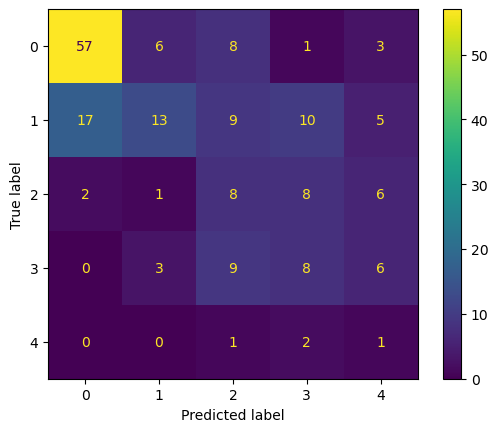

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [36]:
#Decision Tree
pipeline1 = make_pipeline(
    preprocessor, DecisionTreeClassifier(class_weight='balanced')
)

pipeline1.fit(X_train, y_train)
dtc_pred = pipeline1.predict(X_test)

print("Classification Report:\n", classification_report(y_test, dtc_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dtc_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66        75
           1       0.40      0.39      0.39        54
           2       0.15      0.12      0.13        25
           3       0.14      0.12      0.12        26
           4       0.00      0.00      0.00         4

    accuracy                           0.42       184
   macro avg       0.26      0.26      0.26       184
weighted avg       0.42      0.42      0.42       184

Confusion Matrix:
 [[51 14  4  4  2]
 [19 21  6  6  2]
 [ 2 10  3  7  3]
 [ 8  8  5  3  2]
 [ 0  0  2  2  0]]


In [37]:
#Random Forest 
pipeline2 = make_pipeline(
    preprocessor, RandomForestClassifier(class_weight='balanced')
)

pipeline2.fit(X_train, y_train)
rf_pred = pipeline2.predict(X_test)

print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75        75
           1       0.51      0.39      0.44        54
           2       0.40      0.24      0.30        25
           3       0.26      0.19      0.22        26
           4       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.36      0.35      0.34       184
weighted avg       0.50      0.54      0.51       184

Confusion Matrix:
 [[68  4  2  1  0]
 [26 21  2  5  0]
 [ 4  8  6  6  1]
 [ 9  8  3  5  1]
 [ 0  0  2  2  0]]


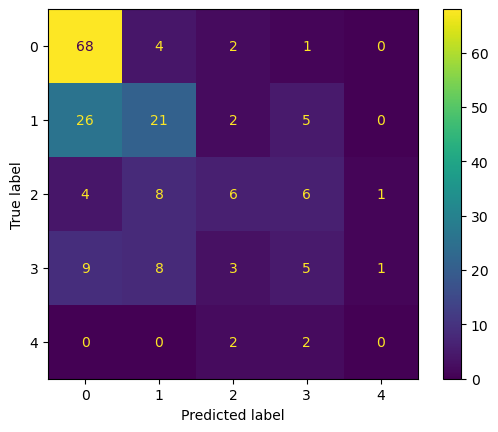

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred)).plot()

In [39]:
pipeline3 = make_pipeline(
    preprocessor, KNeighborsClassifier()
)

pipeline3.fit(X_train, y_train)
kc_pred = pipeline2.predict(X_test)

print("Classification Report:\n", classification_report(y_test, kc_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, kc_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75        75
           1       0.51      0.39      0.44        54
           2       0.40      0.24      0.30        25
           3       0.26      0.19      0.22        26
           4       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.36      0.35      0.34       184
weighted avg       0.50      0.54      0.51       184

Confusion Matrix:
 [[68  4  2  1  0]
 [26 21  2  5  0]
 [ 4  8  6  6  1]
 [ 9  8  3  5  1]
 [ 0  0  2  2  0]]


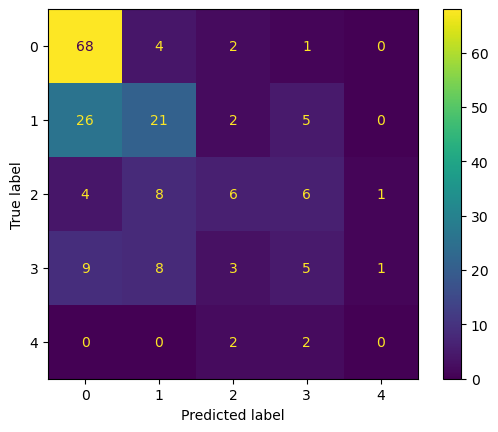

In [40]:
ConfusionMatrixDisplay(confusion_matrix(y_test, kc_pred)).plot()

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression tuning
log_reg_params = {
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__solver': ['liblinear', 'lbfgs']
}

log_reg_grid_search = GridSearchCV(pipeline, log_reg_params, cv=5, scoring='accuracy')
log_reg_grid_search.fit(X_train, y_train)

print("Best parameters for Logistic Regression: ", log_reg_grid_search.best_params_)

# Random Forest tuning
rf_params = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [10, 20, None],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(pipeline2, rf_params, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest: ", rf_grid_search.best_params_)


Best parameters for Logistic Regression:  {'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear'}
Best parameters for Random Forest:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}


In [42]:
pipeline_rf = make_pipeline(
    preprocessor, RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
)

pipeline_rf.fit(X_train, y_train)
rf_pred1 = pipeline_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, rf_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.92      0.78        75
           1       0.52      0.46      0.49        54
           2       0.44      0.28      0.34        25
           3       0.35      0.23      0.28        26
           4       0.00      0.00      0.00         4

    accuracy                           0.58       184
   macro avg       0.40      0.38      0.38       184
weighted avg       0.54      0.58      0.55       184

Confusion Matrix:
 [[69  3  3  0  0]
 [23 25  3  3  0]
 [ 4  8  7  6  0]
 [ 7 11  2  6  0]
 [ 0  1  1  2  0]]


C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [50]:
# Preprocess manually
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_prep, y_train)

y_pred = xgb_model.predict(X_test_prep)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.65      0.84      0.73        75
           1       0.52      0.52      0.52        54
           2       0.41      0.28      0.33        25
           3       0.29      0.15      0.20        26
           4       0.00      0.00      0.00         4

    accuracy                           0.55       184
   macro avg       0.37      0.36      0.36       184
weighted avg       0.51      0.55      0.52       184



C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:39:43] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [49]:
import xgboost
print(xgboost.__version__)

2.1.1
